# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [2]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np


# Create two new dataframes
north_call_center = pd.read_csv("NorthCallCenter.csv")
south_call_center = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
#Code Used:
north_reps = len(pd.unique(north_call_center["Rep ID"]))
print (north_reps)

9


#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
#Code Used:
south_reps = len(pd.unique(south_call_center["Rep ID"]))
print (south_reps)

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
#Code Used:
north_call_center_mean = north_call_center [["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()
print(north_call_center_mean)

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [6]:
#Code Used:
south_call_center_mean = south_call_center [["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()
print(south_call_center_mean)

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [7]:
# Code Used:
north_call_center_time_block = north_call_center.groupby(["Time Block"])["Time Block"].count()
print(north_call_center_time_block)
south_call_center_time_block = south_call_center.groupby(["Time Block"])["Time Block"].count()
print(south_call_center_time_block)
time_block_sum = north_call_center_time_block

# the above code is for the individual centers.
# the below code is for the centers together.

time_block_total = pd.concat([north_call_center, south_call_center])
time_block_count = time_block_total.groupby(["Time Block"])["Time Block"].count()
print(time_block_count)


Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64
Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Time Block, dtype: int64
Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 

In [8]:
# Code Used
# Add Additional Cells as needed.


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 

In [9]:
#Code Used
# Add Additional Cells as needed.


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: 

In [10]:
#Code Used
# Add Additional Cells as needed.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I feel like the sale and lost call columns are not really necessary. I would drop those two columns.

In [11]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [12]:
# Create dataframe for the entire company named df
df = pd.concat([north_call_center, south_call_center])

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35


In [13]:
# Code Used
df_rep = df.groupby(["Branch", "Rep ID"])["Rep ID"].count()
print(df_rep)

# Add Additional Cells as needed.
# Not sure how to sort it by calls.

Branch  Rep ID
North   Amanda    23
        Andy      23
        Brent     37
        Cam       24
        Duke      29
        Joe       26
        Lilly     30
        Todd      29
        Xander    24
South   Alice     20
        Eric      35
        George    29
        Helga     31
        Josh      26
        Karl      28
        Kate      29
        Randy     33
        Sandy     32
        Sharon    25
        Susan     26
Name: Rep ID, dtype: int64


In [14]:
sorted_df = df_rep.sort_values()
print(sorted_df)

Branch  Rep ID
South   Alice     20
North   Amanda    23
        Andy      23
        Cam       24
        Xander    24
South   Sharon    25
        Susan     26
North   Joe       26
South   Josh      26
        Karl      28
North   Duke      29
        Todd      29
South   George    29
        Kate      29
North   Lilly     30
South   Helga     31
        Sandy     32
        Randy     33
        Eric      35
North   Brent     37
Name: Rep ID, dtype: int64


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 7
- South Branch = 4
- Company Wide = 11
- Do any of these fall out of the optimal range of 2-5%? I think the North would fall out of that because if there 11 total abandoned calls. 7/11 is 64%

In [15]:
# Code Used
df_call_abandonment_rate = df.groupby(["Branch", "Abandoned"])["Abandoned"].count()
print(df_call_abandonment_rate)
df_sum = df['Abandoned'].sum()
print(df_sum)
# Add Additional Cells as needed.

Branch  Abandoned
North   0            238
        1              7
South   0            310
        1              4
Name: Abandoned, dtype: int64
11


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%
- South Branch = 38.10%
- Company Wide = 38.94%

In [130]:
# Code Used

north_branch_wait = north_call_center.groupby(["Incoming Wait Time"])["Incoming Wait Time"].count()
sum_north_branch_wait = north_branch_wait.sum()

south_branch_wait = south_call_center.groupby(["Incoming Wait Time"])["Incoming Wait Time"].count()
sum_south_branch_wait = south_branch_wait.sum()

north_calls_within_two_seconds = north_call_center[north_call_center["Incoming Wait Time"] <= 2.0]
north_rep_calls = north_calls_within_two_seconds.groupby(["Incoming Wait Time"]).sum()
sum_north = north_rep_calls.sum()

south_calls_within_two_seconds = south_call_center[south_call_center["Incoming Wait Time"] <= 2.0]
south_rep_calls = south_calls_within_two_seconds.groupby(["Incoming Wait Time"]).sum()
sum_south = south_rep_calls.sum()

service_level_north = (sum_north / sum_north_branch_wait) * 100
service_level_south = (sum_south / sum_south_branch_wait) * 100

total_wait_within_two_seconds = sum_north + sum_south
total_for_whole_company = sum_north_branch_wait + sum_south_branch_wait
service_level_for_whole_company = (total_wait_within_two_seconds / total_for_whole_company) * 100


# print(sum_north_branch_wait)
# print(sum_south_branch_wait)
# print(sum_north)
# print(sum_south)
print(service_level_north)
print(service_level_south)
# print(total_wait_within_two_seconds)
# print(total_for_whole_company)
print(service_level_for_whole_company)


# Add Additional Cells as needed.
#33/82 = 40%
#48/126 = 38%
#81/208 = 39%

Unnamed: 0               643.902439
Lost Call                  0.000000
Abandoned                  2.439024
Busy Minutes             403.658537
Not Ready Minutes         76.829268
During Call Wait Time    128.048780
Calls                     40.243902
dtype: float64
Unnamed: 0               895.238095
Lost Call                  0.793651
Abandoned                  0.000000
Busy Minutes             382.539683
Not Ready Minutes         73.809524
During Call Wait Time    120.634921
Calls                     38.095238
dtype: float64
Unnamed: 0               796.153846
Lost Call                  0.480769
Abandoned                  0.961538
Busy Minutes             390.865385
Not Ready Minutes         75.000000
During Call Wait Time    123.557692
Calls                     38.942308
dtype: float64


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [17]:
# Code Used 
df_answer_speed = df.groupby(["Branch"])["Incoming Wait Time"].mean()
print(df_answer_speed)
df_average = df["Incoming Wait Time"].mean()
print(df_average)

Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64
3.019230769230769


In [18]:
df_call_abandonment_rate = df.groupby(["Branch", "Queue", "Abandoned"])["Abandoned"].count()
print(df_call_abandonment_rate)

Branch  Queue  Abandoned
North   A      0             92
               1              4
        B      0            146
               1              3
South   C      0            137
               1              1
        D      0            173
               1              3
Name: Abandoned, dtype: int64


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar graph because it most clearly shows you the comparison between the queues and the abandoned calss.

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}
          A         B         C         D
0  0.041667  0.020134  0.007246  0.017045


Text(0.5, 0, 'Queues')

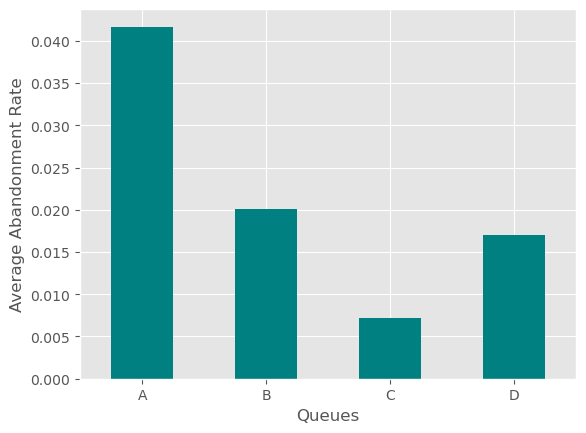

In [62]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib import style
style.use('ggplot')
#plt.reParams["figure.figsize"] = [10,6]

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

print(abandonment_rates)
df2 = pd.DataFrame([abandonment_rates], index = [0]).T
print(df2.T)

#Your Code Here:
# df2 = pd.DataFrame([abandonment_rates], index = queues)
# df3 = pd.DataFrame.from_dict(abandonment_rates, orient='index')
# df2.plot.bar(rot=0, title='Average Abandonment Rate Per Queue', figsize=(15,10), fontsize=12)
# df2.plot(kind='bar', legend = False)

df2.plot.bar(rot=0, legend=False, color='teal')
plt.ylabel("Average Abandonment Rate")
plt.xlabel("Queues")

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a line graph so that you could see the drastic differences between the abilities of the individual reps.

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333
        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333


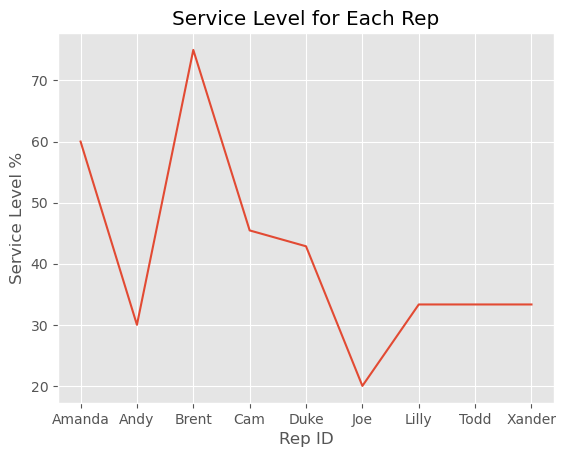

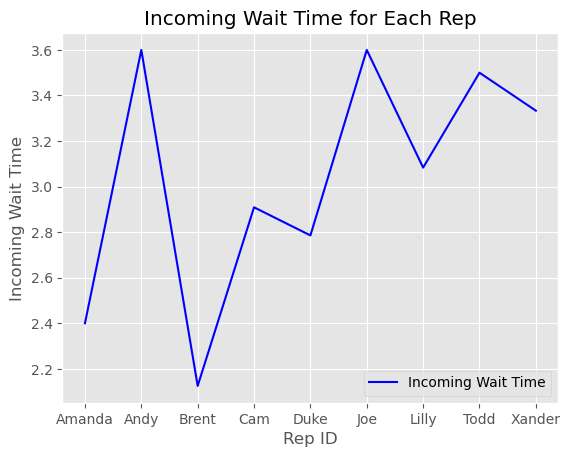

In [26]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_call_center.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_call_center[north_call_center["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_call_center[north_call_center["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
print(north_plt)
print(service_level)
# fig3 = pd.DataFrame([north_plt], index = [0])
service_level["Service Level %"].plot.line(x="Rep ID", y="Service Level %", rot=0)
plt.xlabel("Rep ID")
plt.ylabel("Service Level %")
plt.title("Service Level for Each Rep")
north_plt.plot.line(x="Rep ID", y = "Incoming Wait Time", rot=0, color='b')
plt.xlabel("Rep ID")
plt.ylabel("Incoming Wait Time")
plt.title("Incoming Wait Time for Each Rep")
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a grouped bar graph because it shows you the data side by side for each individual type of call.

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64
{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}


Text(0, 0.5, 'Number of Calls')

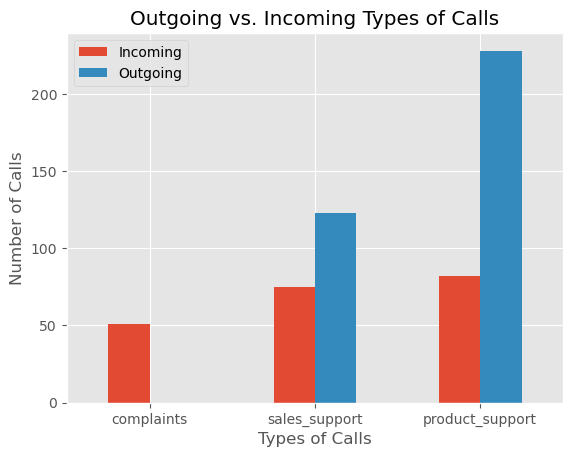

In [21]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

print(complaints)
print(sales_support)
print(product_support)

#Your Code Here:
fig1 = pd.DataFrame([complaints, sales_support, product_support], index = ['complaints', 'sales_support', 'product_support'])
# fig1.plot()
fig1.plot.bar(rot=0)
plt.title('Outgoing vs. Incoming Types of Calls')
plt.xlabel('Types of Calls')
plt.ylabel('Number of Calls')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
Manipulation question 2 shows us that the South Branch has a lower percentage of abandoned calls. The average speed of answering is about the same for the branches, but the South Branch is doing a little bit better at answering the phone calls.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
Of the 9 time blocks the South Branch answers more calls during 6 of them. The North has 4 of the lowest Reps answering calls, and the South has 4 of the highest Reps who answer calls. South has the fewest abandoned calls and the best speed of answering calls. The service level shows that the South has more answered calls and a better percentage of less than 2 min wait time. I think with that information the North Branch would benefit the most from the extra help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: